In [105]:
from pathlib import Path
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
from LPR.CCPD.DataModule import CCPDImagesDataModule
from OCR.architecture import CharacterRecognizer
from src.LPR.CCPD.model.Image import CCPDImage

path = Path('/mnt/f/Data/CCPD2019/ccpd_base/')

ocr_path = '~/models/LPR-OCR/ranged-7-10/lightning_logs/version_29/checkpoints/epoch=64-step=18120.ckpt'

ocr = CharacterRecognizer.load_from_checkpoint(ocr_path)
datamodule = CCPDImagesDataModule(vocab=ocr.vocab, path='/mnt/f/Data/CCPD2019', batch_size=1)
datamodule.setup('fit')

loader = datamodule.train_dataloader()
result = next(iter(loader))[0].squeeze().T.numpy()

Detected 19112 images in /mnt/f/Data/CCPD2019/train/**/*.jpg
Detected 5687 images in /mnt/f/Data/CCPD2019/val/**/*.jpg


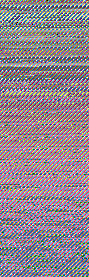

In [30]:
Image.fromarray(result, 'RGB')

In [122]:
img = CCPDImage.load(path / '00205459770115-90_85-352&516_448&547-444&547_368&549_364&517_440&515-0_0_22_10_26_29_24-128-7.jpg', True).img
torched = transforms.ToTensor()(img)
print(torched.shape)

transforms.ToPILImage()(torched)

torch.Size([3, 31, 96])


In [ ]:
CCPDImage.load(path / '00223060344828-90_89-441&517_538&546-530&552_447&548_447&512_530&516-0_0_13_16_33_30_33-148-14.jpg').img

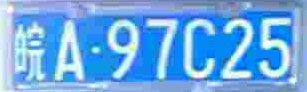

In [10]:
CCPDImage.load(path /'0223012452107-90_86-297&470_604&562-601&567_305&571_309&472_605&468-0_0_33_31_2_26_29-153-43.jpg').img